# Projet de simulation de données en psychiatrie

Ce notebook contient la simulation d'un dataset en psychiatrie afin d'analyser et de modéliser des données relatives aux scores psychiatriques et aux volumes des régions cérébrales. On utilisera notamment des scores de dépression de Hamilton, des scores d'anxiété d'Hamilton, des volumes de l'hippocampe et des volumes du cortex préfrontal.


## Sommaire du notebook
1. Importation des bibliothèques nécessaires
2. Création et visualisation des données simulées
3. Analyse exploratoire des données
4. Préparation des données pour la modélisation
5. Construction et évaluation d'un modèle de machine learning


## Importation des bibliothèques nécessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


## Création et visualisation des données

### Simulation de données pour analyse psychiatrique

On va générer un ensemble de données simulées qui pourraient être utilisées dans le cadre d'une étude psychiatrique. Cela permet de modéliser des comportements ou des caractéristiques pertinentes pour des analyses de data science, telles que l'impact de divers facteurs sur les troubles psychiatriques.

### Description des variables simulées :
- **`Age`** : Généré pour représenter les âges des sujets de l'étude. Les âges sont répartis uniformément entre 18 et 79 ans.
- **`Sex`** : Les sexes des individus sont générés avec une probabilité de 60% pour 'Male' et 40% pour 'Female', reflétant une distribution inégale souvent observée dans des populations spécifiques ou des conditions d'étude. Ce modèle de choix suit une distribution binomiale pour chaque élément choisi individuellement (comme un essai Bernoulli avec deux issues possibles)
- **`HAM-D Score`** : Scores sur l'échelle de dépression de Hamilton, une mesure couramment utilisée pour évaluer la sévérité de la dépression. Les scores sont générés aléatoirement entre 0 et 24, où des scores plus élevés indiquent une dépression plus sévère.
- **`HAM-A Score`** : Scores sur l'échelle d'anxiété de Hamilton, utilisée pour quantifier le niveau d'anxiété. Les scores varient de 0 à 56.
- **`Hippocampal Volume (mm^3)`** : Le volume de l'hippocampe, généré selon une distribution normale avec une moyenne de 4500 mm³ et un écart-type de 300 mm³. Le volume de l'hippocampe est souvent étudié dans le contexte de maladies neurodégénératives et psychiatriques.
- **`Prefrontal Cortex Volume (mm^3)`** : Volume du cortex préfrontal, également généré suivant une distribution normale. Ce volume, avec une moyenne de 5500 mm³ et un écart-type de 500 mm³, est crucial pour des fonctions telles que la prise de décision et la régulation émotionnelle.

### Structure du DataFrame :
Le DataFrame `df` créé contient toutes les données générées, organisées en colonnes correspondant à chaque variable. Ce format est pratique pour l'analyse ultérieure, permettant l'utilisation de techniques statistiques et de modélisation pour explorer les relations entre ces variables et les conditions psychiatriques potentielles.


In [23]:
# Génération des données
n = 100
ages = np.random.randint(18, 80, size=n)
sexes = np.random.choice(['Female', 'Male'], size=n, p=[0.6, 0.4])
ham_d_scores = np.random.randint(0, 25, size=n)
ham_a_scores = np.random.randint(0, 57, size=n)
hippocampal_volumes = np.random.normal(loc=4500, scale=300, size=n)
prefrontal_volumes = np.random.normal(loc=5500, scale=500, size=n)

# Création du DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Sex': sexes,
    'HAM-D Score': ham_d_scores,
    'HAM-A Score': ham_a_scores,
    'Hippocampal Volume (mm^3)': hippocampal_volumes,
    'Prefrontal Cortex Volume (mm^3)': prefrontal_volumes
})


#### Histogrammes des scores HAM-D et des volumes hippocampaux

Pour mieux comprendre la distribution des variables, on créé des histogrammes pour deux des variables clés : les scores HAM-D et les volumes hippocampaux.

Pour rappel, le **score HAM-D** (Hamilton Depression Rating Scale) est un indicateur couramment utilisé pour évaluer la sévérité de la dépression.
- **Axes :**
  - **Abscisse (X-axis) :** Scores HAM-D, allant de 0 à 24.
  - **Ordonnée (Y-axis) :** Fréquence des scores, indiquant combien de fois chaque intervalle de score apparaît dans le dataset.

Le **volume hippocampal** est souvent lié à des conditions neurologiques et psychiatriques, incluant la maladie d'Alzheimer et la dépression. 

- **Axes :**
  - **Abscisse (X-axis) :** Volume de l'hippocampe en mm³.
  - **Ordonnée (Y-axis) :** Fréquence des différents volumes, montrant combien de participants ont des volumes dans chaque intervalle spécifié.



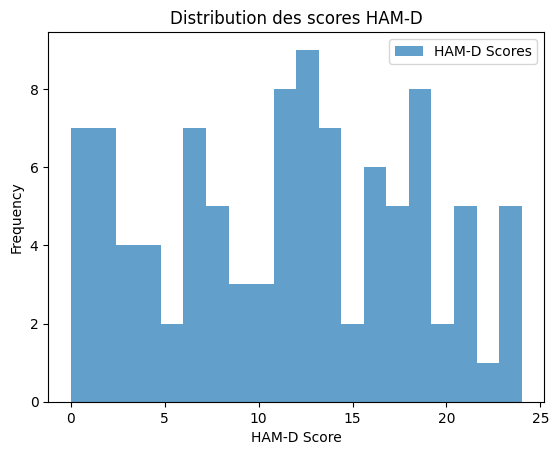

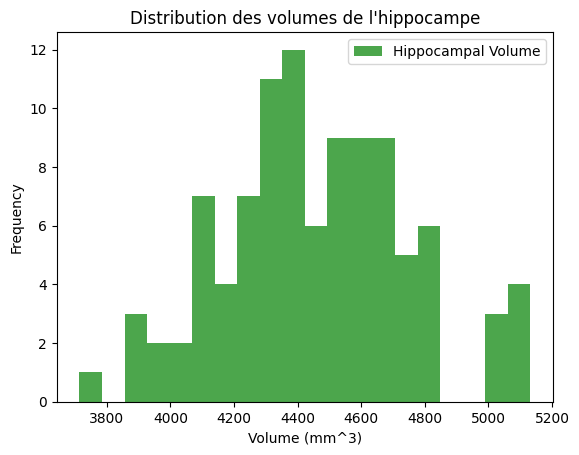

In [24]:
import matplotlib.pyplot as plt

# Histogramme des scores HAM-D
plt.hist(df['HAM-D Score'], bins=20, alpha=0.7, label='HAM-D Scores')
plt.xlabel('HAM-D Score')
plt.ylabel('Frequency')
plt.title('Distribution des scores HAM-D')
plt.legend()
plt.show()

# Histogramme des volumes hippocampaux
plt.hist(df['Hippocampal Volume (mm^3)'], bins=20, alpha=0.7, color='green', label='Hippocampal Volume')
plt.xlabel('Volume (mm^3)')
plt.ylabel('Frequency')
plt.title('Distribution des volumes de l\'hippocampe')
plt.legend()
plt.show()


#### Exploration des Relations entre Variables avec Pairplot

Pour une analyse plus approfondie des interactions entre plusieurs variables clés de notre dataset, on utilise un pairplot fourni par la bibliothèque Seaborn. Cette visualisation nous permet de voir les relations bivariées entre chaque paire de variables ainsi que la distribution de chaque variable individuelle dans la diagonale.

- **Variables Incluses :**
  - **HAM-D Score :** Scores de la Hamilton Depression Rating Scale.
  - **HAM-A Score :** Scores de la Hamilton Anxiety Rating Scale.
  - **Hippocampal Volume (mm^3) :** Volume de l'hippocampe en mm³.
  - **Prefrontal Cortex Volume (mm^3) :** Volume du cortex préfrontal en mm³.

#### Utilité du Pairplot
- **Corrélation entre les variables :** Les graphiques hors de la diagonale permettent d'observer s'il existe une corrélation linéaire ou non linéaire entre les variables. Par exemple, une relation potentiellement intéressante pourrait être visible entre les scores de dépression et les volumes hippocampaux.
- **Distribution des variables :** Les histogrammes sur la diagonale offrent un aperçu de la distribution de chaque variable, montrant par exemple si les scores ou les volumes sont normalement distribués ou s'ils présentent une asymétrie.
- **Impact du sexe :** La coloration par sexe aide à identifier si les distributions de ces mesures varient significativement entre les hommes et les femmes, ce qui peut être crucial pour les études qui examinent les différences de genre dans les contextes psychiatriques ou neurologiques.



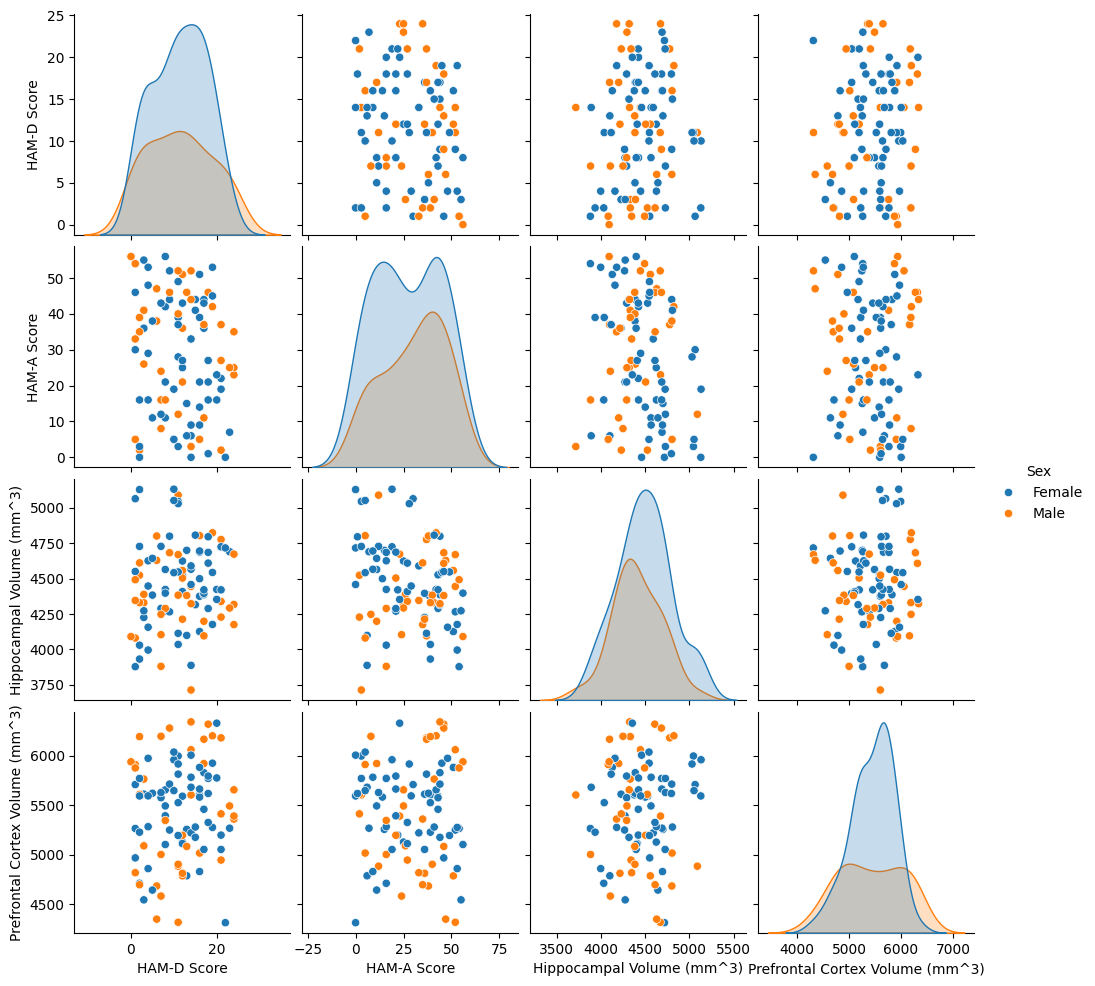

In [25]:
sns.pairplot(df, hue='Sex', vars=['HAM-D Score', 'HAM-A Score', 'Hippocampal Volume (mm^3)', 'Prefrontal Cortex Volume (mm^3)'])
plt.show()


## Analyse exploratoire des données

#### Analyse de corrélation

Pour permettre une analyse de corrélation quantitative entre toutes les variables, y compris celles catégorielles comme le sexe, nous allons d'abord transformer la colonne 'Sex' en valeurs numériques (encodage). Cela est essentiel car les méthodes de corrélation standard requièrent des données numériques pour calculer les coefficients de corrélation.

#### Processus d'encodage
- **Encodage de la colonne 'Sex' :** 
  - Les valeurs 'Female' sont encodées comme `1`.
  - Les valeurs 'Male' sont encodées comme `0`.
  
  Cette méthode d'encodage est appelée encodage binaire ou encodage par indicateur (dummy encoding). Elle transforme la variable catégorielle en une forme qui peut être intégrée dans des calculs numériques et des modèles statistiques.

#### Matrice de corrélation
- **Calcul de la matrice de corrélation :** Une fois toutes les variables exprimées en termes numériques, nous calculons la matrice de corrélation qui mesure la relation linéaire entre chaque paire de variables dans le dataset.
- **Visualisation avec Heatmap :** 
  - Les valeurs de corrélation varient de -1 à 1. Une valeur proche de 1 indique une forte corrélation positive, une valeur proche de -1 indique une forte corrélation négative, et une valeur proche de 0 indique l'absence de corrélation linéaire.
  - La heatmap est annotée avec les valeurs de corrélation pour faciliter l'interprétation.

### Interprétation des résultats
- **Insights Potentiels :** Cette analyse peut révéler des insights importants, comme la relation entre les scores psychiatriques (HAM-D, HAM-A) et les volumes cérébraux, ou l'impact du sexe sur ces variables.
- **Guidage pour des Analyses Ultérieures :** Les corrélations observées peuvent guider des analyses plus approfondies, telles que des régressions multivariées ou des modèles prédictifs, en suggérant quelles variables inclure comme prédicteurs ou comme variables à expliquer.



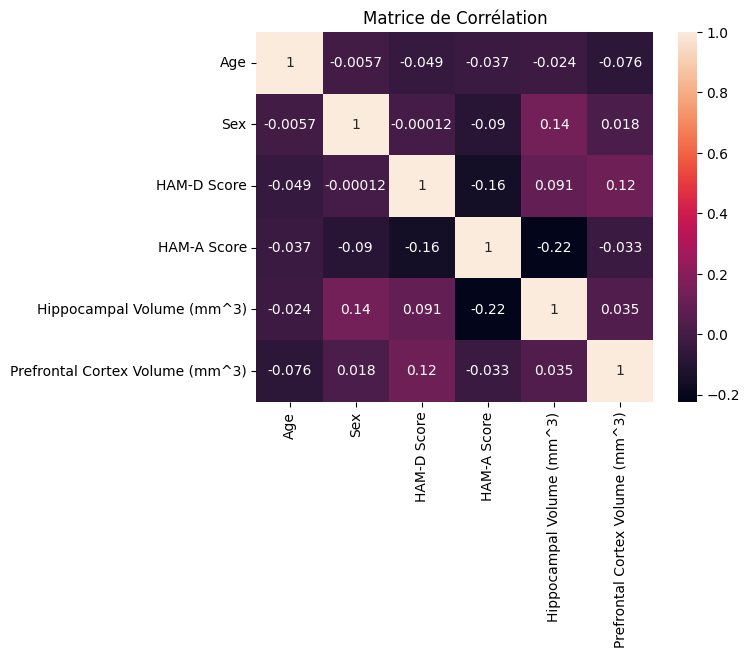

In [26]:
# Encodage de la colonne sexe
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Female' else 0)

# Analyse de corrélation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matrice de Corrélation')
plt.show()


## Préparation des données pour la modélisation

Dans cette étape, nous préparons le jeu de données pour l'application de techniques de modélisation statistique, notamment les modèles de régression qui permettront de prédire les scores HAM-D à partir d'autres variables mesurées.

#### Sélection des caractéristiques (Features)
- **Variables indépendantes (X) :**
  - `Age` : L'âge du sujet, une variable continue.
  - `Sex` : Le sexe du sujet, préalablement encodé en valeurs numériques (1 pour Male, 0 pour Female).
  - `Hippocampal Volume (mm^3)` : Le volume de l'hippocampe, mesuré en mm³, une variable continue pouvant influencer les fonctions cognitives et psychiatriques.
  - `Prefrontal Cortex Volume (mm^3)` : Le volume du cortex préfrontal, également en mm³, connu pour son rôle dans la gestion des fonctions exécutives et émotionnelles.

- **Variable dépendante (y) :**
  - `HAM-D Score` : Le score sur l'échelle de dépression de Hamilton, qui est une mesure de la sévérité de la dépression chez les individus.

#### Division du dataset
- **Utilisation de la fonction `train_test_split` :**
  - Le dataset est divisé en ensembles d'entraînement (`X_train`, `y_train`) et de test (`X_test`, `y_test`).
  - `test_size=0.2` signifie que 20% du dataset est réservé pour le test, et les 80% restants sont utilisés pour l'entraînement du modèle.
  - `random_state=42` est utilisé pour assurer la reproductibilité des résultats en fixant le générateur de nombres aléatoires utilisé pour la division.

La séparation en ensembles d'entraînement et de test aide à valider l'efficacité du modèle dans des conditions réalistes, évitant le surapprentissage et assurant que le modèle peut généraliser à partir de nouvelles données non vues durant l'entraînement.



In [27]:

X = df[['Age', 'Sex', 'Hippocampal Volume (mm^3)', 'Prefrontal Cortex Volume (mm^3)']]
y = df['HAM-D Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Construction et évaluation d'un modèle de Machine Learning

#### Modélisation avec Random Forest

Nous utilisons un modèle de régression basé sur la méthode Random Forest pour prédire les scores HAM-D à partir des variables sélectionnées. Le Random Forest est un choix populaire pour ce type de tâches en raison de sa flexibilité, de sa robustesse aux surapprentissages, et de sa capacité à gérer des relations non linéaires et des interactions complexes entre les caractéristiques.

#### Configuration
  - Utilisation de `RandomForestRegressor` avec `n_estimators=100`, ce qui signifie que le modèle utilise 100 arbres pour faire la prédiction. Un plus grand nombre d'arbres peut améliorer la précision mais augmente également le temps de calcul.
  - `random_state=42` garantit que les résultats sont reproductibles, permettant une comparaison cohérente des performances du modèle à travers différents essais.

#### Entraînement du modèle
- Le modèle est entraîné sur l'ensemble d'entraînement (`X_train`, `y_train`) pour qu'il puisse apprendre les relations entre les caractéristiques et la variable cible.

### Prédiction et évaluation
- **Prédiction :** Après l'entraînement, le modèle est utilisé pour prédire les scores HAM-D de l'ensemble de test (`X_test`), ce qui permet d'évaluer comment le modèle performe sur des données qu'il n'a pas encore vues.
- **Évaluation du Modèle :**
  - **MSE (Mean Squared Error) :** Calculé pour mesurer l'erreur moyenne au carré entre les valeurs prédites et les valeurs réelles. Une MSE élevée indique une erreur plus importante dans les prédictions.
  - **RMSE (Root Mean Squared Error) :** C'est la racine carrée de la MSE, qui redimensionne l'erreur dans les unités originales de la variable cible, facilitant ainsi l'interprétation. 


In [28]:
# Modélisation avec un Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


MSE: 55.34
RMSE: 7.44
